In [1]:
#Import Libraries

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
#Read in Data

data = pd.read_csv('Documents/Documents_for_URAP/BM_AM_180808_RegVirtStackSlices-Table_1.csv')
new_data = data[["Islet1","Pax6","CABP5","SCGN","CAVIII","Rec","Calb","Parv"]]
array_data = new_data.iloc[0:10672, 0:8].values
#print(array_data)
#plt.scatter(array_data[:, 0], array_data[:, 1], s=50);

In [6]:
#Running PCA on Input Data In Order to Make it 2-Dimensional
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(array_data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
array_principalDf = principalDf.iloc[0:10672, 0:2].values

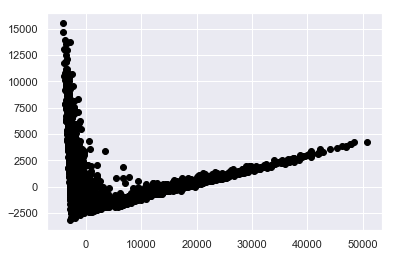

In [7]:
#Plotting PCA Output

plt.scatter(array_principalDf[:,0],array_principalDf[:,1],c='black')

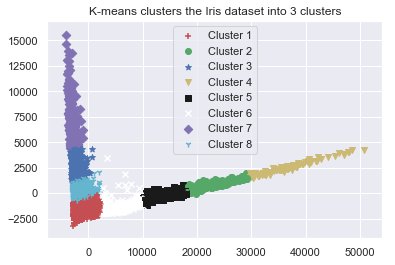

In [8]:
#Running KMeans on the 2-Dimesional Data

kmeans = KMeans(n_clusters=8)
kmeans.fit(array_principalDf)

#PLotting KMeans with 8 Clusters

for i in range(0, array_principalDf.shape[0]):
    if kmeans.labels_[i] == 0:
        c1 = plt.scatter(array_principalDf[i,0],array_principalDf[i,1],c='r',marker='+')
    elif kmeans.labels_[i] == 1:
        c2 = plt.scatter(array_principalDf[i,0],array_principalDf[i,1],c='g',marker='o')
    elif kmeans.labels_[i] == 2:
        c3 = plt.scatter(array_principalDf[i,0],array_principalDf[i,1],c='b',marker='*')
    elif kmeans.labels_[i] == 3:
        c4 = plt.scatter(array_principalDf[i,0],array_principalDf[i,1],c='y',marker= "v")
    elif kmeans.labels_[i] == 4:
        c5 = plt.scatter(array_principalDf[i,0],array_principalDf[i,1],c='k',marker="s")
    elif kmeans.labels_[i] == 5:
        c6 = plt.scatter(array_principalDf[i,0],array_principalDf[i,1],c='w',marker="x")
    elif kmeans.labels_[i] == 6:
        c7 = plt.scatter(array_principalDf[i,0],array_principalDf[i,1],c='m',marker="D")
    elif kmeans.labels_[i] == 7:
        c8 = plt.scatter(array_principalDf[i,0],array_principalDf[i,1],c='c',marker="1")
    
plt.legend([c1, c2, c3, c4, c5, c6, c7, c8],['Cluster 1', 'Cluster 2','Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8'])
plt.title('K-means clusters the Iris dataset into 3 clusters')
plt.show()

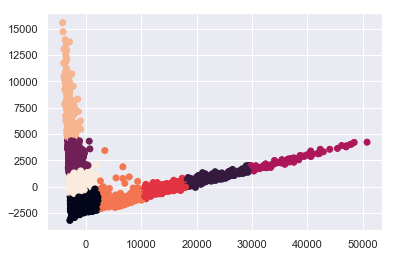

In [10]:
#Plotting KMeans Again

plt.title('K-means with 8 clusters')
plt.scatter(array_principalDf[:, 0], array_principalDf[:, 1], c=kmeans.labels_)
plt.show()

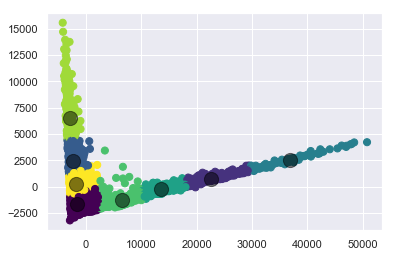

In [11]:
#Plotting KMeans with the KMeans centers

y_kmeans = kmeans.predict(principalDf)
plt.scatter(array_principalDf[:, 0], array_principalDf[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);